# Malware Detection using Machine Learning  
## Team: RedHat Hackers  


## 1. Data Loading  
- Loaded datasets using pandas:  
  - `API_Functions.csv`  
  - `DLLs_Imported.csv`  
  - `portable_executable.csv`

In [3]:
import pandas as pd

In [4]:
# creating data frame of API_Functions
api_df = pd.read_csv('/kaggle/input/cds-datasets/API_Functions.csv')

In [5]:
api_df.head()

,SHA256,Type,getaclinformation,getace,getsecuritydescriptordacl,regqueryvalueexa,regopenkeyexa,getsecurityinfo,isvalidsid,regclosekey,...,drawdibclose,ord1107,wsasetblockinghook,setupinstallfileexa,setupterminatefilelog,setuplogfilew,setupopenmasterinf,setupinstallfileexw,setupgetlinecountw,setupdigethwprofilefriendlynameexw
0,dacbe8cb72dd746539792a50e84965fefef73feaa07b5d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,d3dc7512ce75db33b2c3063fa99245e9ca9fe3b086462f...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,b350fac81533f02981dc2176ed17163177d92d9405758e...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,dfee618043a47b7b09305df0ca460559d9f567ee246c7b...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,c7b2e4e4fb2fcc44c953673ff57c3d14bdf5d2008f35e9...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
api_df.shape

(28017, 21920)

In [7]:
# creating data frame of DLLs_Imported
dll_df = pd.read_csv('/kaggle/input/cds-datasets/DLLs_Imported.csv')

In [8]:
dll_df.head()

,SHA256,Type,advapi32.dll,kernel32.dll,vspmsg.dll,ole32.dll,oleaut32.dll,psapi.dll,setupapi.dll,shlwapi.dll,...,odbccp32.dll,api-ms-win-crt-environment-l1-1-0.dll,api-ms-win-core-memory-l1-1-3.dll,api-ms-win-core-datetime-l1-1-0.dll,api-ms-win-core-psapi-ansi-l1-1-0.dll,api-ms-win-core-fibers-l1-1-0.dll,api-ms-win-core-file-l2-1-0.dll,api-ms-win-core-sysinfo-l1-2-0.dll,dbgeng.dll,d3d11.dll
0,2a053f32b1d48539e3e2807f86754be87ce95b08378467...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2f031a1752f7067fb9f483ae0ac5f3036c9b66cc4af40e...,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,308e8bb2e8a3b67607d2454370e0b50147b42049bda813...,0,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,31aaba443b9869e6e68c17125f8d7989cbd762fb38ae3a...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,373d0778d083a04943032826a3571e5e8d450a9535f5a9...,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dll_df.shape

(28016, 631)

In [10]:
# creating dataframe of portable_executables
pe_df = pd.read_csv('/kaggle/input/cds-datasets/portable_executable.csv')

In [11]:
pe_df.head()

,SHA256,Type,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,...,tls_Characteristics,pdata_Misc_VirtualSize,pdata_VirtualAddress,pdata_SizeOfRawData,pdata_PointerToRawData,pdata_PointerToRelocations,pdata_PointerToLinenumbers,pdata_NumberOfRelocations,pdata_NumberOfLinenumbers,pdata_Characteristics
0,dacbe8cb72dd746539792a50e84965fefef73feaa07b5d...,0,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
1,d3dc7512ce75db33b2c3063fa99245e9ca9fe3b086462f...,0,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
2,b350fac81533f02981dc2176ed17163177d92d9405758e...,0,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
3,dfee618043a47b7b09305df0ca460559d9f567ee246c7b...,0,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0
4,c7b2e4e4fb2fcc44c953673ff57c3d14bdf5d2008f35e9...,0,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
pe_df.shape

(28014, 144)

## 2. Feature Extraction  
- Used **Random Forest Classifier** to select important features.  
- Dropped non-numeric columns.  
- Split dataset into training and testing sets (70%-30%).  
- Selected features based on model importance.  
- Saved extracted features into new CSV files.  


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [14]:
def select_and_save_features(df, output_file_name):
    # Drop non-numeric columns
    df_numeric = df.drop(columns=["SHA256"])
    
    # Separate features and target variable
    X = df_numeric.drop(columns=["Type"])
    y = df_numeric["Type"]
    
    # Step 1: Split Dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Step 2: Initialize Random Forest Model
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    clf.fit(X, y)
    
    # Select important features
    selector = SelectFromModel(clf, threshold="mean", prefit=True)
    selected_features = X.columns[selector.get_support()].to_list()
    
    # Step 4: Get Selected Features
    print(f"\nSelected Features by RF ({len(selected_features)}): {selected_features}")
    selected_features.append("SHA256")
    selected_features.append("Type")
    df = df[selected_features]
    df.to_csv(output_file_name)
    print(f"output saved to {output_file_name}")

- **Feature Extraction From Datasets**

In [15]:
#API_Functions.csv
select_and_save_features(api_df, '/kaggle/working/api_selected_features.csv')


Selected Features by RF (1770): ['getaclinformation', 'getace', 'regqueryvalueexa', 'regopenkeyexa', 'regclosekey', 'getnamedsecurityinfow', 'regsetvalueexw', 'regcreatekeyexw', 'regqueryvalueexw', 'regopenkeyexw', 'adjusttokenprivileges', 'lookupprivilegevaluea', 'gettokeninformation', 'openprocesstoken', 'setentriesinacla', 'setthreadpriority', 'terminatethread', 'virtualallocex', 'createremotethread', 'module32nextw', 'createtoolhelp32snapshot', 'process32nextw', 'process32firstw', 'getexitcodeprocess', 'readprocessmemory', 'createfilea', 'resumethread', 'suspendthread', 'createmutexw', 'createfilemappingw', 'createeventw', 'releasemutex', 'getversion', 'expandenvironmentstringsw', 'waitnamedpipea', 'setnamedpipehandlestate', 'loadlibraryexa', 'readconsolew', 'createmutexa', 'opensemaphorea', 'createsemaphorea', 'heapsetinformation', 'setunhandledexceptionfilter', 'localalloc', 'getprocaddress', 'switchtothread', 'getcurrentprocessid', 'deviceiocontrol', 'openeventa', 'processidtos

In [16]:
# DLLs_Imported.csv
select_and_save_features(dll_df, '/kaggle/working/dll_selected_features.csv')


Selected Features by RF (48): ['advapi32.dll', 'kernel32.dll', 'ole32.dll', 'oleaut32.dll', 'psapi.dll', 'shlwapi.dll', 'msvcr110.dll', 'user32.dll', 'msvcrt.dll', 'shell32.dll', 'ntdll.dll', 'version.dll', 'userenv.dll', 'cabinet.dll', 'comctl32.dll', 'gdi32.dll', 'netapi32.dll', 'winmm.dll', 'mpr.dll', 'crypt32.dll', 'odbc32.dll', 'ws2_32.dll', 'comdlg32.dll', 'wtsapi32.dll', 'wininet.dll', 'gdiplus.dll', 'winhttp.dll', 'msvcr90.dll', 'ncrypt.dll', 'urlmon.dll', 'winspool.drv', 'msimg32.dll', 'mscoree.dll', 'imagehlp.dll', 'oledlg.dll', 'oleacc.dll', 'msvcp90.dll', 'libgimp-2.0-0.dll', 'libgimpbase-2.0-0.dll', 'libglib-2.0-0.dll', 'libintl-8.dll', 'libgimpwidgets-2.0-0.dll', 'msvbvm60.dll', 'msys-1.0.dll', 'msys-intl-8.dll', 'mfc42.dll', 'msvcp60.dll', 'shfolder.dll']
output saved to /kaggle/working/dll_selected_features.csv


In [17]:
# portable_executable.csv
select_and_save_features(pe_df, '/kaggle/working/pe_selected_features.csv')


Selected Features by RF (40): ['e_lfanew', 'NumberOfSections', 'TimeDateStamp', 'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MajorImageVersion', 'MajorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'DllCharacteristics', 'text_Misc_VirtualSize', 'text_VirtualAddress', 'text_SizeOfRawData', 'text_PointerToRawData', 'data_Misc_VirtualSize', 'data_VirtualAddress', 'data_SizeOfRawData', 'data_PointerToRawData', 'data_Characteristics', 'rdata_Misc_VirtualSize', 'rdata_VirtualAddress', 'rdata_SizeOfRawData', 'rdata_PointerToRawData', 'rsrc_Misc_VirtualSize', 'rsrc_VirtualAddress', 'rsrc_SizeOfRawData', 'rsrc_PointerToRawData', 'reloc_Misc_VirtualSize', 'reloc_VirtualAddress', 'reloc_SizeOfRawData', 'reloc_PointerToRawData']
output saved to /kaggle/working/pe_selected_features.csv


In [18]:
api_df = pd.read_csv('/kaggle/working/api_selected_features.csv')

In [19]:
api_df.shape

(28017, 1773)

In [20]:
dll_df = pd.read_csv('/kaggle/working/dll_selected_features.csv')

In [21]:
dll_df.shape

(28016, 51)

In [22]:
pe_df = pd.read_csv('/kaggle/working/pe_selected_features.csv')

In [23]:
pe_df.shape

(28014, 43)

## 3. Merging Selected Features  
- Merged the feature-selected datasets (`API_Functions.csv`, `DLLs_Imported.csv`, `portable_executable.csv`).  
- Handled missing values by filling NaNs with `0`.  
- Grouped by `SHA256` and took the maximum value for each feature.  

In [24]:
df = pd.concat([api_df, dll_df, pe_df], axis=0, ignore_index=True)
df.fillna(0, inplace=True)
df_merged = df.groupby("SHA256", as_index=False).max()

In [25]:
df_merged.to_csv('/kaggle/working/merged_data.csv', index=False)

In [26]:
df_merged.shape

(28014, 1861)

In [27]:
df_merged.head()

,SHA256,Unnamed: 0,getaclinformation,getace,regqueryvalueexa,regopenkeyexa,regclosekey,getnamedsecurityinfow,regsetvalueexw,regcreatekeyexw,...,rdata_SizeOfRawData,rdata_PointerToRawData,rsrc_Misc_VirtualSize,rsrc_VirtualAddress,rsrc_SizeOfRawData,rsrc_PointerToRawData,reloc_Misc_VirtualSize,reloc_VirtualAddress,reloc_SizeOfRawData,reloc_PointerToRawData
0,00037a0cc29f3c99e88aeb57af189e291c6fe38b8b2527...,10987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,184856.0,720896.0,185344.0,701952.0,12.0,712704.0,512.0,701440.0
1,000449f94c6e689a227209669911783303c5157257d65a...,15669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,106496.0,5283840.0,76800.0,3190272.0,0.0,0.0,0.0,0.0
2,0005d98e4c18425eeeedf31ebfb0bf4ba74f92aa56aa07...,23409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,976.0,737280.0,1024.0,727552.0,12.0,745472.0,512.0,728576.0
3,0005e5022cd608e05426c717720cab930b17de32f9afde...,1794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2368.0,180224.0,4096.0,180224.0,0.0,0.0,0.0,0.0
4,000a04b60f05b748c8716f9bb32fdd88b06f782e0e3f2e...,6579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
print(df_merged.isnull().sum())
print("Total Null Values : " ,df_merged.isnull().sum().sum())

SHA256                    0
Unnamed: 0                0
getaclinformation         0
getace                    0
regqueryvalueexa          0
                         ..
rsrc_PointerToRawData     0
reloc_Misc_VirtualSize    0
reloc_VirtualAddress      0
reloc_SizeOfRawData       0
reloc_PointerToRawData    0
Length: 1861, dtype: int64
Total Null Values :  0


In [29]:
df_merged = df_merged.dropna(axis=0) 
df_merged['Type'] = df_merged['Type'].astype('category').cat.codes

In [30]:
df_merged.head()

,SHA256,Unnamed: 0,getaclinformation,getace,regqueryvalueexa,regopenkeyexa,regclosekey,getnamedsecurityinfow,regsetvalueexw,regcreatekeyexw,...,rdata_SizeOfRawData,rdata_PointerToRawData,rsrc_Misc_VirtualSize,rsrc_VirtualAddress,rsrc_SizeOfRawData,rsrc_PointerToRawData,reloc_Misc_VirtualSize,reloc_VirtualAddress,reloc_SizeOfRawData,reloc_PointerToRawData
0,00037a0cc29f3c99e88aeb57af189e291c6fe38b8b2527...,10987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,184856.0,720896.0,185344.0,701952.0,12.0,712704.0,512.0,701440.0
1,000449f94c6e689a227209669911783303c5157257d65a...,15669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,106496.0,5283840.0,76800.0,3190272.0,0.0,0.0,0.0,0.0
2,0005d98e4c18425eeeedf31ebfb0bf4ba74f92aa56aa07...,23409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,976.0,737280.0,1024.0,727552.0,12.0,745472.0,512.0,728576.0
3,0005e5022cd608e05426c717720cab930b17de32f9afde...,1794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2368.0,180224.0,4096.0,180224.0,0.0,0.0,0.0,0.0
4,000a04b60f05b748c8716f9bb32fdd88b06f782e0e3f2e...,6579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Train-Test Split  
- Split dataset into training and testing sets (70%-30%).  
- Target variable: `Type`.  

In [37]:
X = df_merged.drop(columns=['Type', 'Unnamed: 0', 'SHA256'])
y = df_merged['Type']

In [38]:
y.unique()

array([3, 4, 5, 1, 2, 0, 6], dtype=int8)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Standardization  
- Applied **StandardScaler** to normalize the dataset.  


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled=scaler.fit_transform(X)

In [41]:
print(df['Type'].value_counts())

Type
4    14472
1    14355
3    14046
2    13224
5    12008
6    10560
0     5382
Name: count, dtype: int64


## 6. Classification Models   

#### 6.1a Model Training  
- Used **Random Forest Classifier** with `n_estimators=100`.  
- Trained model on extracted features.  


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [44]:
# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

#### 6.1b Confusion Matrix  
- Evaluated model using a confusion matrix.

In [45]:
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classifier Results")
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Results
0.8813135820096377
              precision    recall  f1-score   support

           0       0.97      0.89      0.92       351
           1       0.96      0.94      0.95       978
           2       0.99      0.99      0.99       887
           3       0.88      0.84      0.86       914
           4       0.93      0.89      0.91       962
           5       0.75      0.78      0.76       775
           6       0.72      0.82      0.77       736

    accuracy                           0.88      5603
   macro avg       0.88      0.88      0.88      5603
weighted avg       0.89      0.88      0.88      5603



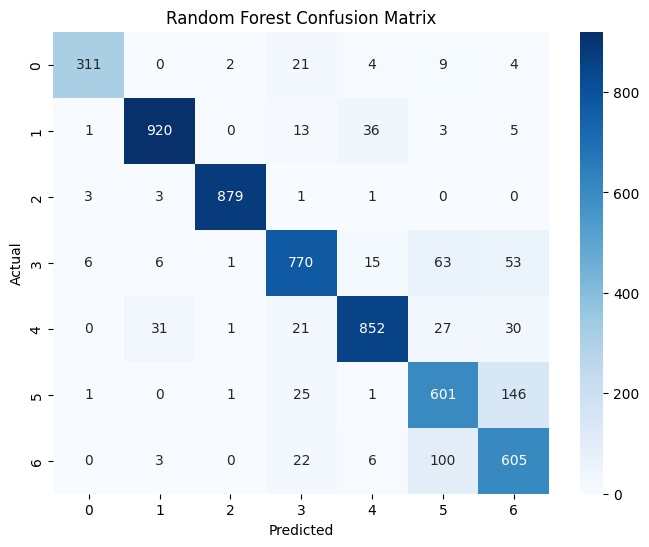

In [46]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=range(7), yticklabels=range(7))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [54]:
import pickle

with open('/kaggle/working/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Optionally, check if the pickle file is saved correctly
print("Random Forest model saved to /kaggle/working/rf_model.pkl")

Random Forest model saved to /kaggle/working/rf_model.pkl


### 6.2 XGBoost  


In [47]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 2.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


#### 6.2a Model Training  
- Used **XGBoost Classifier** with `use_label_encoder=False` and `eval_metric='mlogloss'`.  
- Trained model on extracted features.  

In [48]:
# Model 6: XGBoost Classifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
xgb_model = xgb.XGBClassifier(n_estimators=1000, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost Classifier Results")
print(accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier Results
0.8957701231483134
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       351
           1       0.95      0.94      0.94       978
           2       1.00      0.99      0.99       887
           3       0.90      0.85      0.88       914
           4       0.92      0.90      0.91       962
           5       0.80      0.80      0.80       775
           6       0.75      0.84      0.79       736

    accuracy                           0.90      5603
   macro avg       0.90      0.90      0.90      5603
weighted avg       0.90      0.90      0.90      5603




#### 6.2b Confusion Matrix  
- Evaluated model using a confusion matrix.  


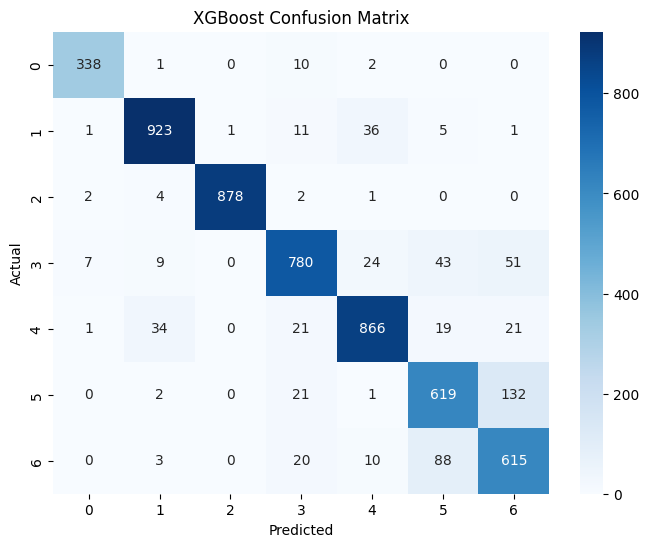

In [49]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=range(7), yticklabels=range(7))
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
import pickle

with open('/kaggle/working/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Optionally, check if the pickle file is saved correctly
print("XGBoost model saved to /kaggle/working/xgb_model.pkl")

XGBoost model saved to /kaggle/working/xgb_model.pkl


### 6.3 Decision Tree  


#### 6.3a Model Training  
- Used **Decision Tree Classifier** with `random_state=42`.  
- Trained model on extracted features.

In [51]:
from sklearn.tree import DecisionTreeClassifier

# Model 2: Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)
print("Decision Tree Classifier Results")
print(accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Results
0.8725682669998215
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       351
           1       0.93      0.94      0.93       978
           2       0.99      0.99      0.99       887
           3       0.87      0.82      0.85       914
           4       0.89      0.89      0.89       962
           5       0.76      0.78      0.77       775
           6       0.75      0.77      0.76       736

    accuracy                           0.87      5603
   macro avg       0.87      0.87      0.87      5603
weighted avg       0.87      0.87      0.87      5603




#### 6.3b Confusion Matrix  
- Evaluated model using a confusion matrix.

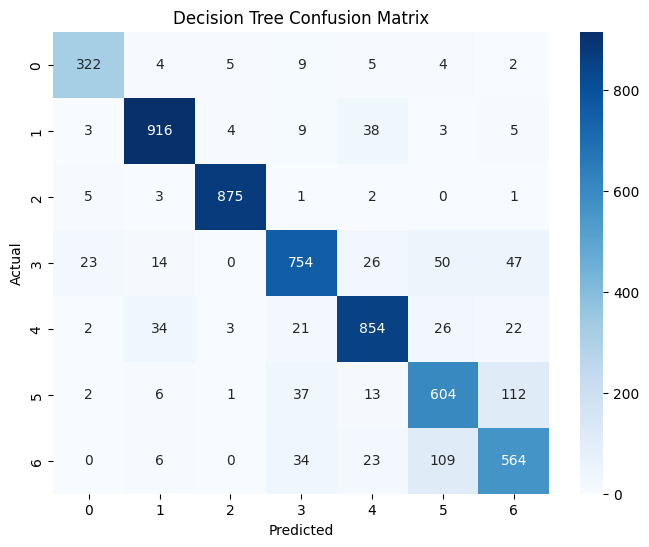

In [52]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=range(7), yticklabels=range(7))
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [55]:
import pickle

with open('/kaggle/working/dt_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

# Optionally, check if the pickle file is saved correctly
print("Decision Tree model saved to /kaggle/working/dt_model.pkl")

Decision Tree model saved to /kaggle/working/dt_model.pkl



## 7. Voting Classifier  
- Combined all models using a **Voting Classifier** for better accuracy.  


In [53]:

# Combine the predictions by majority voting
import numpy as np
# Stack the predictions together
predictions = np.array([y_pred_rf, y_pred_xgb, y_pred_dt])

# Apply majority voting (for each sample, select the most common class)
y_pred_voting = [np.bincount(pred).argmax() for pred in predictions.T]

# Evaluate the manually implemented voting classifier
print(accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

0.8964840264144208
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       351
           1       0.95      0.94      0.95       978
           2       1.00      0.99      0.99       887
           3       0.90      0.85      0.88       914
           4       0.92      0.90      0.91       962
           5       0.81      0.79      0.80       775
           6       0.75      0.85      0.80       736

    accuracy                           0.90      5603
   macro avg       0.90      0.90      0.90      5603
weighted avg       0.90      0.90      0.90      5603

